# 07. Analytical Solution of Multi-spore Diffusion
## Numerical experiments - Week 03/2025

_Boyan Mihaylov, MSc Computational Science (UVA/VU)_

## 1. Derivation of Analytical Scheme

The general solution for the diffusion of concentrations on a 3D lattice with an initial delta pulse at $(x,y,z)=(0,0,0)$ follows the Green's function:

$$
\begin{equation}
G(x,y,z,t)=\frac{1}{(4\pi Dt)^{3/2}}e^{-\frac{\Delta{x}^2+\Delta{y}^2+\Delta{z}^2}{4Dt}}
\end{equation}
$$

Or, alternatively, defining $\vec{r}$ as the position in space and $|\Delta{\vec{r}}|^2=\Delta{x}^2+\Delta{y}^2+\Delta{z}^2$ as the squared distance from the measured point to the source:

$$
\begin{equation}
c(\vec{r},t)=G(|\vec{r}|,t)=\frac{1}{(4\pi Dt)^{3/2}}e^{-\frac{|\Delta{\vec{r}}|^2}{4Dt}}
\end{equation}
$$

It is assumed for now that the spores are small compared to the scale of the observed domain and are a negligable obstacle for diffusion. However, they do add new concentration to the system, at a rate determined by the permeation through their cell wall. If this rate is denoted as $Q$, the concentration at a point in space incorporates the accumulation of solute added to the system over time:

$$
\begin{equation}
c(\vec{r},t)=\int_0^t{Q{(t')}G{(\vec{r}, t-t')}dt'}
\end{equation}
$$

The inhibitor release rate at time $t$ can be expressed as

$$
\begin{equation}
Q{(t)}=JA,
\end{equation}
$$

where $J$ is the flux through the cell wall and $A$ is the spore surface area. The flux is defined as

$$
\begin{equation}
J=P_s\Delta{c_s{(t)}},
\end{equation}
$$

with $P_s$ being the permeation constant (measured in units of velocity) and $\Delta{c_s{(t)}}$ the concentration difference between the spore and the exterior. This concentration difference evolves from an initial difference $\Delta{c_s{(0)}}$ as follows:

$$
\begin{equation}
\Delta{c_s{(t)}}=\Delta{c_s{(0)}}e^{-t/\tau},
\end{equation}
$$

where $\tau=\frac{V}{AP_s}$. The initial concentration drop can be thought of as the difference between the concentration at the interior of the spore interface and the concentration immediately outside of it. Following the previous assumption about the spore neglected as an obstacle, the location just outside of it is the entry point for new concentration, namely $\vec{r}_0=(x_0, y_0, z_0)$. Therefore:

$$
\begin{equation}
\Delta{c_s{(0)}}=c_0-c(\vec{r}_0,0)
\end{equation}
$$

But since no prior inhibitor is assumed just outside the spore at $t=0$, this simplifies to

$$
\begin{equation}
\Delta{c_s{(0)}}=c_0
\end{equation}
$$

Thus, the concentration transport at time $t$ amounts to

$$
\begin{equation}
Q{(t)}=AP_sc_0e^{-\frac{P_sAt}{V}}.
\end{equation}
$$

Plugging this equation into the expression for the concentration and substituting the respective Green's function yields:

$$
\begin{equation}
c(\vec{r},t)=\int_0^t{AP_sc_0e^{-\frac{P_sAt'}{V}}\frac{1}{(4\pi D(t-t'))^{3/2}}e^{-\frac{|\Delta{\vec{r}}|^2}{4D(t-t')}}dt'}
\end{equation}
$$

The integral can be simplified by defining $\tau'=t-t'$, such that $t'=t-\tau'$ and $dt'=-d\tau'$:

$$
\begin{equation}
c(\vec{r},t)=AP_s\frac{c_0}{(4\pi D)^{3/2}}e^{-\frac{P_sAt}{V}}\int_0^t{\frac{1}{\tau'^{3/2}}\exp{\left(\frac{P_sA\tau'}{V}-\frac{|\Delta{\vec{r}}|^2}{4D\tau'}\right)}d\tau'}
\end{equation}
$$

Now, assuming that there are $M$ sources which start releasing simultaneously with the same $c_0$, the resulting concentration over the lattice is simply the sum of the contributions from each source:

$$
\begin{equation}
c(\vec{r},t)=\frac{AP_sc_0}{(4\pi D)^{3/2}}e^{-\frac{P_sAt}{V}}\sum_{i=0}^{M}{\int_0^t{\tau'^{-3/2}\exp{\left(\frac{P_sA\tau'}{V}-\frac{|\Delta{\vec{r}}_i|^2}{4D\tau'}\right)}d\tau'}},
\end{equation}
$$

where $|\Delta{\vec{r}}_i|^2=\Delta{x_i}^2+\Delta{y_i}^2+\Delta{z_i}^2$ is the squared distance to a single source with index $i$. In reality, only a selection of sources around the sampling point need to be considered, since the radius of diffusion grows as $\sqrt{t}$ and only spores falling within this radius have effective contributions. Defining $R_{\textrm{diff}}=\sqrt{4Dt}$ as the estimated diffusion radius, the sum over the sources can be revised:

$$
\begin{equation}
c(\vec{r},t)=\frac{AP_sc_0}{(4\pi D)^{3/2}}e^{-\frac{P_sAt}{V}}\sum_{\substack{i,j,k \\ |\Delta{\vec{r}}_{ijk}|\le R_{\textrm{diff}}}}{\int_0^t{\tau'^{-3/2}\exp{\left(\frac{P_sA\tau'}{V}-\frac{|\Delta{\vec{r}}_i|^2}{4D\tau'}\right)}d\tau'}}.
\end{equation}
$$

When measuring at the container node of a concentration source in a cubic grid of spores, one can make use of the numerous symmetries around the measurement point and pre-calculate the distances to the relevant sources (all source nodes at a spore density $\rho_s$ within a cube of size $2R_{\textrm{diff}}^3$ centered at $\vec{r}$), filter out the ones with $|\Delta{\vec{r}}_{ijk}|^2<R_{\textrm{diff}}^2$ and compute their multiplicity. This enables a one-time evaluation of the more complex term above for every unique distance, then multiplying it by the number of distance duplicates.

Alternatively, if one considers the limit of an infinite grid of resources with uniform density $\rho_s$, the sum can be approximated by an integral:

$$
\begin{equation}
\sum_{i=0}^{M}{\int_0^t{\tau'^{-3/2}\exp{\left(\frac{P_sA\tau'}{V}-\frac{|\Delta{\vec{r}}_i|^2}{4D\tau'}\right)}d\tau'}}\approx\rho_s\int_{\mathbb{R}^3}{d{\vec{r}}\int_0^t{\tau'^{-3/2}\exp{\left(\frac{P_sA\tau'}{V}-\frac{|\Delta{\vec{r}}_i|^2}{4D\tau'}\right)}d\tau'}}.
\end{equation}
$$

This integral can be converted to polar coordinates, with radius $r$ representing the distance from the measured point to the source and going from zero up to the effective diffusion radius:

$$
\begin{equation}
\rho_s\int_{\mathbb{R}^3}{d{\vec{r}}\int_0^t{\tau'^{-3/2}\exp{\left(\frac{P_sA\tau'}{V}-\frac{r^2}{4D\tau'}\right)}d\tau'}}=\rho_s\int_0^{R_{\textrm{diff}}}{d{r}\ r^2\int_0^t{\tau'^{-3/2}\exp{\left(\frac{P_sA\tau'}{V}-\frac{r^2}{4D\tau'}\right)}d\tau'}\int_0^{2\pi}{d{\theta}\sin{\theta}\int_0^\pi{d{\phi}}}},
\end{equation}
$$

$$
\begin{equation}
\rho_s\int_{\mathbb{R}^3}{d{\vec{r}}\int_0^t{\tau'^{-3/2}\exp{\left(\frac{P_sA\tau'}{V}-\frac{r^2}{4D\tau'}\right)}d\tau'}}=4\pi\rho_s\int_0^{R_{\textrm{diff}}}{d{r}\ r^2\int_0^t{\tau'^{-3/2}\exp{\left(\frac{P_sA\tau'}{V}-\frac{r^2}{4D\tau'}\right)}d\tau'}}.
\end{equation}
$$

This enables the expression of the concentration over time as

$$
\begin{equation}
c(\vec{r},t)=\frac{AP_sc_0}{(4\pi D)^{3/2}}e^{-\frac{P_sAt}{V}}4\pi\rho_s\int_0^{R_{\textrm{diff}}}{d{r}\ r^2\int_0^t{\tau'^{-3/2}\exp{\left(\frac{P_sA\tau'}{V}-\frac{r^2}{4D\tau'}\right)}d\tau'}}.
\end{equation}
$$

<!-- Examining the time integral, a solution of this form is found in Gradshteyn and Ryzhik[1]:

$$
\begin{equation}
\int_0^\infty{x^{\nu-1}e^{-\frac{\beta}{x}-\gamma x}d{x}}=2\left(\frac{\beta}{\gamma}\right)^{\frac{\nu}{2}}K_\nu(2\sqrt{\beta\gamma}),
\end{equation}
$$

where $K_\nu$ is a modified Bessel function of the second kind. Specifying $x=\tau'$, $\gamma=-\tau^{-1}=-\frac{P_sA}{V}$, $\beta=\frac{|\Delta{\vec{r}}_i|^2}{4D}$ and $\nu=-\frac{1}{2}$, such that $\nu-1=-\frac{3}{2}$ the integral can be written as

$$
\begin{equation}
\int_0^\infty{\tau'^{-{3/2}}e^{-\frac{\beta}{\tau'}-\gamma \tau'}d{\tau'}}=2\left(\frac{\beta}{\gamma}\right)^{-\frac{1}{4}}K_{-1/2}(2\sqrt{\beta\gamma}).
\end{equation}
$$

The Bessel function has the property $K_{-\nu}=K_\nu$ and, in the particular case, has the formula

$$
\begin{equation}
K_{1/2}{(z)}=\sqrt{\frac{\pi}{2z}}e^{-z}.
\end{equation}
$$

Thus, the integral simplifies to

$$
\begin{equation}
\int_0^\infty{\tau'^{-{3/2}}e^{-\frac{\beta}{\tau'}-\gamma \tau'}d{\tau'}}=\sqrt{\frac{\pi}{\beta}}e^{-2\sqrt{\beta\gamma}}.
\end{equation}
$$

This integral can be limited to a finite interval by splitting it into two integrals at $t'=t$ and subtracting the upper half-integral from the full integral with an infinite limit:

$$
\begin{equation}
\int_0^t{\tau'^{-{3/2}}e^{-\frac{\beta}{\tau'}-\gamma \tau'}d{\tau'}}=\int_0^\infty{\tau'^{-{3/2}}e^{-\frac{\beta}{\tau'}-\gamma t'}d{\tau'}}-\int_t^\infty{\tau'^{-{3/2}}e^{-\frac{\beta}{\tau'}-\gamma \tau'}d{\tau'}}.
\end{equation}
$$

The solution for the upper half-integral involves the complementary error function

$$
\begin{equation}
\textrm{erfc}{(z)}=\frac{2}{\sqrt{\pi}}\int_z^\infty{e^{-w^2}d{w}},
\end{equation}
$$

forming the solution

$$
\begin{equation}
\int_0^t{\tau'^{-{3/2}}e^{-\frac{\beta}{\tau'}-\gamma \tau'}d{\tau'}}=\sqrt{\frac{\pi}{\beta}}e^{-2\sqrt{\beta\gamma}}\textrm{erfc}{\left(\sqrt{\frac{\gamma}{t}}-\sqrt{\beta t}\right)}.
\end{equation}
$$

Substituting this back into the concentration solution and plugging in all relevant variables,

$$
\begin{equation}
c(\vec{r},t)=\frac{AP_sc_0}{(4\pi D)^{3/2}}e^{-\frac{P_sAt}{V}}\sum_{i=0}^{M}{\left[\sqrt{\frac{\pi V}{P_sA}}\exp{\left(-\sqrt{-\frac{|\Delta{\vec{r}}_i|^2 P_sA}{DV}}\right)}\textrm{erfc}{\left(\sqrt{-\frac{P_sA}{Vt}}-\sqrt{\frac{|\Delta{\vec{r}}_i|^2 t}{4D}}\right)}\right]}.
\end{equation}
$$

AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

With this general solution, the case of multiple spores arranged in a regular cubic grid can be explored. Instead of summing through an arbitrary collection of sources, a sum over the rows, columns and layers of an infinite grid can be employed:

$$
\begin{equation}
c(\vec{r},t)=\frac{c_0\sqrt{AP_sV}}{8\pi D^{3/2}}e^{-\frac{P_sAt}{V}}\sum_{i=-\infty}^{\infty}\sum_{j=-\infty}^{\infty}\sum_{k=-\infty}^{\infty}{\left[\exp{\left(-\sqrt{\frac{|\Delta{\vec{r}}_{ijk}|^2 P_sA}{DV}}\right)}\textrm{erfc}{\left(\sqrt{\frac{P_sA}{Vt}}-\sqrt{\frac{|\Delta{\vec{r}}_{ijk}|^2 t}{4D}}\right)}\right]}.
\end{equation}
$$

In reality, only a selection of sources around the sampling point need to be considered, since the radius of diffusion grows as $\sqrt{t}$ and only spores falling within this radius have effective contributions. Defining $R_{\textrm{diff}}=\sqrt{4Dt}$ as the estimated diffusion radius, the sum over the sources can be revised:

$$
\begin{equation}
c(\vec{r},t)=\frac{c_0\sqrt{AP_sV}}{8\pi D^{3/2}}e^{-\frac{P_sAt}{V}}\sum_{\substack{i,j,k \\ |\Delta{\vec{r}}_{ijk}|\le R_{\textrm{diff}}}}{\left[\exp{\left(-\sqrt{\frac{|\Delta{\vec{r}}_{ijk}|^2 P_sA}{DV}}\right)}\textrm{erfc}{\left(\sqrt{\frac{P_sA}{Vt}}-\sqrt{\frac{|\Delta{\vec{r}}_{ijk}|^2 t}{4D}}\right)}\right]}.
\end{equation}
$$

When measuring at the container node of a concentration source in a cubic grid of spores, one can make use of the numerous symmetries around the measurement point and pre-calculate the distances to the relevant sources (all source nodes at a spore density $\rho_s$ within a cube of size $2R_{\textrm{diff}}^3$ centered at $\vec{r}$), filter out the ones with $|\Delta{\vec{r}}_{ijk}|^2<R_{\textrm{diff}}^2$ and compute their multiplicity. This enables a one-time evaluation of the more complex term above for every unique distance, then multiplying it by the number of distance duplicates. -->

CORRECT PYTHON PROCEDURE FOR THIS!!!!!!!!!!!!!!!!!!!!

## 2. Numerical Procedure

The evaluation of $c(\vec{r},t)$ is performed by computing the prefactor and iteratively summing the contributions from the separate spore sources. The integral is thereby solved using the trapezoid rule with a step of $\Delta{\tau'}=0.01$.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
from importlib import reload
import diffusion as diff
import conversions as conv

In [ ]:
def concentration_periodic_permeating_sources(x, t_max, src_density, c0, D, Ps, A, V, n_frames=10):
    """
    Compute the concentration at sampling points
    due to periodically repeating permeating sources within an
    effective diffusion radius.
    inputs:
        x (numpy array): 3D positions of the observation points
        t_max (float): maximum time of observation in seconcs
        src_density (float): number density of sources in spores/mL
        c0 (float): initial concentration at the sources in mol/L
        D (float): diffusion coefficient in um^2/s
        Ps (float): source release rate in um/s
        A (float): source area in um^2
        V (float): source volume in um^3
        dt (float): time step size in seconds
        n_frames (int): number of frames to compute
    """

    # Conversions
    src_density = conv.inverse_mL_to_micrometers_cubed(src_density)

    # Sampling times
    t_samples = np.linspace(0, t_max, n_frames)

    prefactors = c0 * np.sqrt(A * Ps * V) / (8 * np.pi * D**(3/2)) * np.exp(-Ps*A*t_samples/V)

    # Iterate over time frames
    src_sums = np.zeros((x.shape[0], t_samples.shape[0]))
    for i, t in enumerate(t_samples):
        # Find diffusion radius
        R = np.sqrt(4 * D * t)
        
        # Find source grid spacing
        vol_src_cell = 1 / src_density
        dx = vol_src_cell**(1/3)

        # Generate relevant source positions
        if R > dx:
            vol_src_grid = R**3
            src_x = np.arange(0, R, dx)
            src_x = np.hstack([np.flip(-src_x[1:]), src_x])
            src_x, src_y, src_z = np.meshgrid(src_x, src_x, src_x)
            src_x = src_x.flatten()
            src_y = src_y.flatten()
            src_z = src_z.flatten()
            src_pts = np.vstack([src_x, src_y, src_z]).T
        else:
            src_pts = np.array([[0, 0, 0]])

        # Compute distances
        src_distances = np.linalg.norm(x[:, np.newaxis, :] - src_pts[np.newaxis, :, :], axis=2)
        src_distances_unique, unique_counts = np.unique(src_distances, return_counts=True, axis=1)

        # Sum source contributions
        contributions = unique_counts[np.newaxis, :] * np.exp(-np.sqrt(src_distances_unique**2 * Ps * A / (D * V))) * erfc(np.sqrt(Ps * A / (V * t)) - np.sqrt(src_distances_unique**2 * t / (4 * D)))
        # contributions = np.exp(-np.sqrt(src_distances**2 * Ps * A / (D * V))) * erfc(np.sqrt(Ps * A / (V * t)) - np.sqrt(src_distances**2 * t / (4 * D)))
        src_sums[:, i] = np.sum(contributions, axis=1)

    results = prefactors * src_sums
    
    return results, t_samples

## 3. Test and Comparison

Next, a lattice of size $N=64$ ($L=320\mu\textrm{m}$) is used with a single source at $(x_{0},y_{0},z_{0})=(160, 160, 160)$. The experiment time is set to $t=3600$ and the final concentration is sampled at the locations of the source as well as at an additional point $(x_s, y_s, z_s)=(150, 160, 160)$. This way the source and the second sampling point are positioned close enough to make any near-source diffusion noticeable, while keeping enough distance from the boundary to avoid the influence of its periodicity.

The rest of the parameters are set to their values from the previous experiments.

In [38]:
# Inputs
N = 128#256  # Number of grid points
dx = 5  # Grid spacing in microns
D = 600  # micron^2/s
Ps = 0.0002675353069511818 # microns/s
V = 125 # microns^3
A = 150 # microns^2

sample_dist = 8
src_idx = (N//2, N//2, N//2)  # Source index
# pt_sources = np.array([np.array(src_idx) * dx])  # Source positions
xs_obs = np.linspace(0, 0.5 * N * dx, N // (2 * sample_dist) + 1)  # Grid points
xs_obs = np.hstack([np.flip(-xs_obs[1:]), xs_obs])
# y_obs = xs_obs
# ys_obs = np.linspace(0, 0.5 * N * dx, N // sample_dist + 1)  # Grid points
# z_obs = (N // 2) * dx
xs_obs, ys_obs = np.meshgrid(xs_obs, xs_obs)
pt_obs = np.vstack([xs_obs.flatten(), ys_obs.flatten(), np.zeros(xs_obs.size)]).T
# print(f"Sources: {pt_sources}")
# print(f"Observation points: {pt_obs}")

c0 = 1.018  # Initial concentration at sources in M
t_max = 3600  # Maximum time in seconds
n_times = 100  # Number of time points

# Compute the concentration at each observation point using the analytical solution
src_density = 1 / (N * dx) ** 3
ts_analytical = np.linspace(0, t_max, n_times+1)  # Time points
# c_analytical, ts_analytical = concentration_from_permeating_sources(pt_obs, t_max, pt_sources, c0, D, Ps, A, V, n_frames=n_times+1)
c_analytical, ts_analytical = concentration_periodic_permeating_sources(pt_obs, t_max, src_density, c0, D, Ps, A, V, n_frames=n_times+1)

# Compute the concentration at each observation point using the numerical solution
c_init = np.zeros((N, N, N))
c_init[src_idx] = c0
c_numerical, ts_numerical, _ = diff.diffusion_time_dependent_GPU(c_init, t_max, D, Db=None, Ps=Ps, n_save_frames=n_times, spore_idx=src_idx)

Conversion: 3.81469726562500E-21 micrometers^-3
3D simulation with 3D periodic spores
Using D = 600, Db = 0.0013376765347559091, Ps = 0.0002675353069511818
Simulation running for 720000 steps on a lattice of size [640 640 640] microns.


C:\Users\mihbo\AppData\Local\Temp\ipykernel_9612\135228130.py:97: RuntimeWarning: divide by zero encountered in scalar divide
  contributions = np.exp(-np.sqrt(src_distances**2 * Ps * A / (D * V))) * erfc(np.sqrt(Ps * A / (V * t)) - np.sqrt(src_distances**2 * t / (4 * D)))


The results from the simulations are compared in a plot.

<>:41: SyntaxWarning: invalid escape sequence '\m'
<>:42: SyntaxWarning: invalid escape sequence '\m'
<>:54: SyntaxWarning: invalid escape sequence '\m'
<>:55: SyntaxWarning: invalid escape sequence '\m'
<>:41: SyntaxWarning: invalid escape sequence '\m'
<>:42: SyntaxWarning: invalid escape sequence '\m'
<>:54: SyntaxWarning: invalid escape sequence '\m'
<>:55: SyntaxWarning: invalid escape sequence '\m'
C:\Users\mihbo\AppData\Local\Temp\ipykernel_9612\1058792736.py:41: SyntaxWarning: invalid escape sequence '\m'
  axs[0].set_xlabel("$x [\mu m]$")
C:\Users\mihbo\AppData\Local\Temp\ipykernel_9612\1058792736.py:42: SyntaxWarning: invalid escape sequence '\m'
  axs[0].set_ylabel("$y [\mu m]$")
C:\Users\mihbo\AppData\Local\Temp\ipykernel_9612\1058792736.py:54: SyntaxWarning: invalid escape sequence '\m'
  axs[1].set_xlabel("$x [\mu m]$")
C:\Users\mihbo\AppData\Local\Temp\ipykernel_9612\1058792736.py:55: SyntaxWarning: invalid escape sequence '\m'
  axs[1].set_ylabel("$y [\mu m]$")


Analytical time: 108.0
Numerical time: 108.0
Analytical min: 0.0, max: 9.259837720446198e-06
Numerical min: 1.2115588898264944e-08, max: 1.1257995289564142e-06


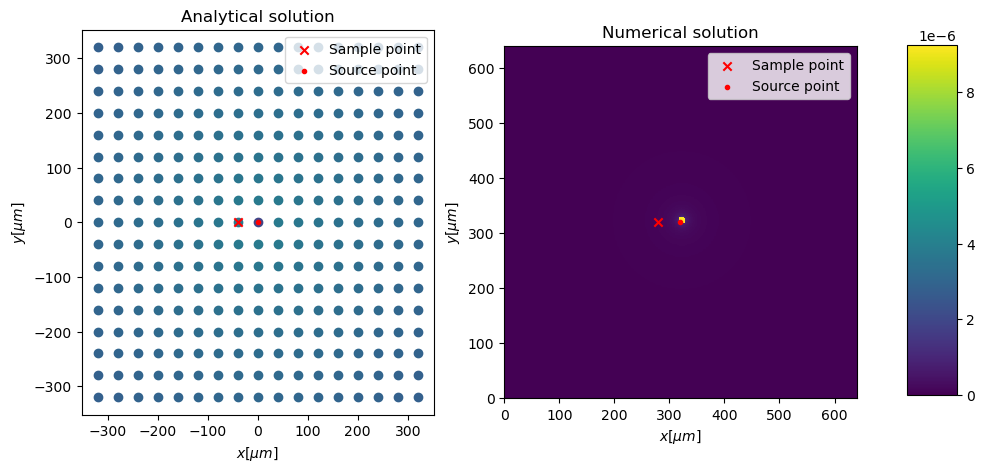

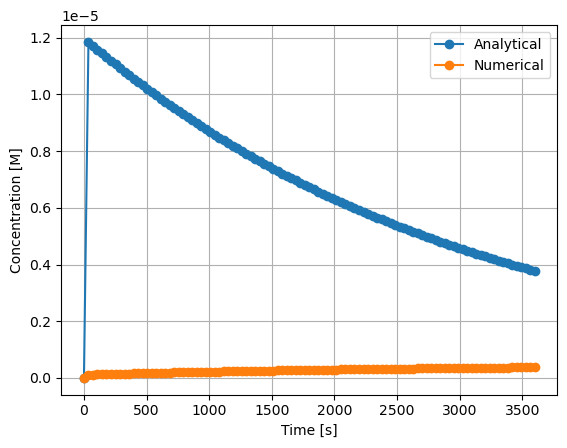

In [40]:
eval_time_idx = 3

print(f"Analytical time: {ts_analytical[eval_time_idx]}")
print(f"Numerical time: {ts_numerical[eval_time_idx]}")

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
palette = plt.get_cmap('viridis')

# Get analytical range
# c_an_mask = np.ones((N//sample_dist+1)**2, dtype=bool)
c_an_mask = np.ones(c_analytical.shape[0], dtype=bool)
src_idx_an = (N//sample_dist//2, N//sample_dist//2)
src_idx_an_flat = src_idx_an[0] * (N//sample_dist+1) + src_idx_an[1]
c_an_mask[src_idx_an_flat] = False
# c_an_mask[0] = False
c_an_medium = c_analytical[c_an_mask][eval_time_idx]
c_an_min = np.min(c_an_medium)
c_an_max = np.max(c_an_medium)
print(f"Analytical min: {c_an_min}, max: {c_an_max}")

# Get numerical range
c_num_slice = c_numerical[eval_time_idx, :, :, src_idx[2]].T

# Exclude the source point index
c_num_mask = np.ones((N, N), dtype=bool)
c_num_mask[src_idx[0], src_idx[1]] = False
c_num_medium = c_num_slice[c_num_mask]

c_num_min = np.min(c_num_medium)
c_num_max = np.max(c_num_medium)
print(f"Numerical min: {c_num_min}, max: {c_num_max}")

min_val = min(c_an_min, c_num_min)
max_val = max(c_an_max, c_num_max)

# Plot analytical solution
for i, pt in enumerate(pt_obs):
    c = c_analytical[i, :][-1]
    axs[0].scatter(pt[0], pt[1], color=palette((c - min_val) / (max_val - min_val)))
axs[0].set_title("Analytical solution")
axs[0].set_xlabel("$x [\mu m]$")
axs[0].set_ylabel("$y [\mu m]$")

# Plot source and sample points
pt_obs_sample = pt_obs[src_idx_an_flat - 1]
axs[0].scatter(pt_obs_sample[0], pt_obs_sample[1], color='red', label="Sample point", marker='x')
pt_obs_sample2 = pt_obs[src_idx_an_flat]
axs[0].scatter(pt_obs_sample2[0], pt_obs_sample2[1], color='red', label="Source point", marker='.')
axs[0].legend()

# Plot numerical solution
img=axs[1].imshow(c_num_slice, cmap='viridis', origin='lower', extent=[0, N*dx, 0, N*dx], vmin=min_val, vmax=max_val)
axs[1].set_title("Numerical solution")
axs[1].set_xlabel("$x [\mu m]$")
axs[1].set_ylabel("$y [\mu m]$")
# axs[1].set_xlim(N*dx*0.4, N*dx*0.6)
# axs[1].set_ylim(N*dx*0.4, N*dx*0.6)

# Plot source and sample points
axs[1].scatter((src_idx[1] - sample_dist) * dx, src_idx[0] * dx, color='red', label="Sample point", marker='x')
axs[1].scatter(src_idx[1] * dx, src_idx[0] *dx, color='red', label="Source point", marker='.')
axs[1].legend()

cbar_ax = fig.add_axes([0.95, 0.15, 0.05, 0.7])
fig.colorbar(img, cax=cbar_ax)
plt.show()

# Plot time series
fig, ax = plt.subplots()
c_an_sample = c_analytical[src_idx_an_flat - 1, :]
c_num_sample = c_numerical[:, src_idx[1] - sample_dist, src_idx[0], N // 2]
ax.plot(ts_analytical, c_an_sample, 'o-', label='Analytical')
ax.plot(ts_numerical, c_num_sample, 'o-', label='Numerical')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Concentration [M]')
# ax.set_yscale('log')
ax.grid()
ax.legend()

The results from the numerical and the analytical scheme show disagreement. The concentration at the sampling point to the side of the source starts from zero for both solutions but quickly spikes to a maximum in the analytical scheme, followed by an exponential decay. Meanwhile, the solution of the numerical scheme at the sampling point very gradually increases towards a plateau. The difference between the solutions remains an entire order of magnitude, albeit relatively small compared to the initial concentration at the source.

Due to the significantly different set of assumptions in the numerical solution (disregaring the spore as a spatial obstacle, observing a continuous spatial and temporal domain), a necessary step for guaranteeing better comparability is to align the numerical scheme to the assumptions of the analytical one.

## References

- [1] Gradshteyn, I. S., I. M. Ryzhik, Alan Jeffrey, Yu. Geronimus, M. Y. Tseytlin and Yuan Cheng Fung. “Table of Integrals, Series, and Products.” Journal of Lubrication Technology 98 (1966): 479-479.